# Python API examples


## Creates

- createUser
- createMarket
- createTrade

### Create user

Creates a new user. Returns signature and verify keys.

~~~~
import requests
url = 'https://https://blocmarket.herokuapp.com/createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example return as json:

~~~~
{'signingKey_hex': '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477',
 'traderId': '1',
 'verifyKey_hex': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}
~~~~
        
### Create/update market

Creates/updates a market. Returns True and market details if successful. 

Specify:
- Market root and branch id
- Minimum and maximum outcomes
- Trader Id
- Sign and verify keys

Note that sending the private key is a terrible idea. In production signing is done on client side.

~~~~
sk = '0cca0a3739eba76cc78823d9f6e898379014d8c53172f5e45c171a3c54a9f477'
vk = 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'
tId = 2

url = 'https://https://blocmarket.herokuapp.com/createMarket'
headers = {'content-type': 'application/json'}
content_makemarket = {"signingKey_hex": sk,
                    "traderId": tId, 
                    "verifyKey_hex": vk,
                    "marketRootId": 1, 
                    "marketBranchId": 1, 
                    "marketMin": 0,
                    "marketMax":1}

response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
~~~~

Example return as json:

~~~~
 {'allChecks': 
     "{'marketId': '1', 'marketRangeChk': True,
     'sigChk': True, 'chainChk': True, 
     'ownerChk': True, 'timeChk': True}",
 'checks': 'False',
 'marketBranchId': 1,
 'marketId': 1,
 'marketMax': 0,
 'marketMin': 1,
 'marketRootId': 1,
 'traderId': 2}
~~~~
    
### Create trade

Create a trade. Returns True and trade details if successful.

Specify:

- Trader Id
- Market Id
- Price
- Quantity
- Sign and verify keys

~~~~
url = 'https://https://blocmarket.herokuapp.com/createTrade'
headers = {'content-type': 'application/json'}
content_maketrade = {'allChecks': 
                         "{'marketChk': True, 'sigChk': True,
                         'chainChk': True, 'timeChk': True,
                         'colChk': True}",
                     "signingKey_hex": sk,
                     "traderId": tId,
                     "verifyKey_hex": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
~~~~

Example return as json:
~~~~
{'checks': 'True',
 'marketId': 1,
 'price': 0.55,
 'quantity': -1,
 'traderId': '2'}
~~~~

## Views

- viewMarketBounds
- viewOrderBook
- viewOpenTrades
- viewMatchedTrades

### View markets

~~~~
url = 'https://https://blocmarket.herokuapp.com/viewMarketBounds'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":2,"2":3,"3":4},
"marketRootId":{"0":1,"1":2,"2":3,"3":4},
"marketBranchId":{"0":1,"1":1,"2":1,"3":1},
"marketMin":{"0":0.0,"1":0.0,"2":0.0,"3":0.0},
"marketMax":{"0":0.7,"1":0.7,"2":0.7,"3":0.7}}'
~~~~

### View full order book

~~~~
url = 'https://https://blocmarket.herokuapp.com/viewOrderBook'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1,"2":1},"price":{"0":0.55,"1":0.55,"2":0.55},
"quantity":{"0":1.0,"1":-1.0,"2":-1.0},"traderId":{"0":1,"1":1,"2":1},
"iMatched":{"0":true,"1":true,"2":true},
"timeStampUTC":{"0":1547976585838,"1":1547976602766,"2":1547976613155}}'
~~~~

### View open trades

~~~~
url = 'https://https://blocmarket.herokuapp.com/viewOpenTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

~~~~
'{"marketId":{"12":1,"15":1,"18":1,"21":1,"24":1},
"price":{"12":0.43,"15":0.43,"18":0.43,"21":0.43,"24":0.43},
"quantity":{"12":-1.0,"15":-1.0,"18":-1.0,"21":-1.0,"24":-1.0},
"traderId":{"12":1,"15":1,"18":1,"21":1,"24":1},"timeStampUTC":
{"12":1547976742476,"15":1547976750344,"18":1547976758683,"21":1547976768968,"24":1547976775537}}'
~~~~

### View matched trades

~~~~
url = 'https://blocmarket.herokuapp.com/viewMatchedTrades'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.43,"1":0.55},"quantity":{"0":0.0,"1":0.0},"traderId":{"0":1,"1":1}}'

~~~~

### View trader summary

A view joining order book and marketTable for a particular trader.

~~~~
url = 'https://blocmarket.herokuapp.com/viewTradeSummary'
headers = {'content-type': 'application/json'}
content = {'traderId': 2}
response = requests.post(url, data=json.dumps(content), headers=headers)
~~~~

Example response as json:

~~~~
'{"marketId":{"0":1,"1":1},"price":{"0":0.8,"1":0.5},
"quantity":{"0":-1.0,"1":-1.0},"traderId":{"0":2,"1":2},
"iMatched":{"0":false,"1":true},
"timeStampUTC":{"0":1547982939316,"1":1547982938964},
"marketMin":{"0":0.0,"1":0.0},"marketMax":{"0":1.0,"1":1.0}}'
~~~~


# Python demonstration

In [4]:
import requests
import json
import numpy as np
import pandas as pd
import time

%matplotlib inline
import matplotlib.pyplot as plt

# Running flask app from powershell
# $env:FLASK_APP = "api"
# $env:FLASK_ENV = "development"
# flask run

# Running flask from terminal on OSX
# export FLASK_APP=api
# export FLASK_ENV=development
# flask run

# Running with gunicorn (heroku, digitalocean, etc):
# Procfile >
# web: gunicorn wsgi --log-file -
# wsgi.py >
# from api import app as application
#
#if __name__ == "__main__":
#    application.run()

# https://devcenter.heroku.com/articles/getting-started-with-python
# https://www.digitalocean.com/community/tutorials/how-to-serve-flask-applications-with-gunicorn-and-nginx-on-ubuntu-14-04


In [42]:
baseurl = 'https://blocmarket.herokuapp.com/'
#baseurl = 'http://127.0.0.1:5000/'
baseurl = 'http://127.0.0.1:7000/'

In [43]:
url = baseurl +'createUser'
headers = {'content-type': 'application/json'}
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [44]:
response.json()

{'signingKey_hex': 'c7ac58be579d14790e6757cff5a0726a9a41c6e2c6fe615b0f0f15d9d5699fcf',
 'traderId': '3',
 'verifyKey_hex': '014b9e70f135e7d8bc109b8675953fce43e3dc553c0e7e353c11f190a982ab26'}

In [45]:
url = baseurl + 'createMarket'

mkRtId = 7
mkId=1
# copy from response
sk = response.json()['signingKey_hex']
vk = response.json()['verifyKey_hex']
tId = response.json()['traderId']

In [46]:
content_makemarket = {"signingKey_hex": sk,
                    "traderId": int(tId), 
                    "verifyKey_hex": vk,
                    "marketRootId": mkRtId, 
                    "marketBranchId": 1, 
                    "marketMin": 0.1,
                    "marketMax":0.9}

response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)

In [47]:
response.json()

{'allChecks': "{'marketId': '7', 'marketRangeChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': True, 'timeChk': True}",
 'checks': 'True',
 'marketBranchId': 1,
 'marketId': 7,
 'marketMax': 0.9,
 'marketMin': 0.1,
 'marketRootId': 7,
 'traderId': 3}

In [48]:
# Save market id from response
mkId = response.json()['marketId']


In [49]:
pd.DataFrame(response.json(), index=[0])

,allChecks,checks,marketBranchId,marketId,marketMax,marketMin,marketRootId,traderId
0,"{'marketId': '7', 'marketRangeChk': True, 'sig...",True,1,7,0.9,0.1,7,3


In [50]:
# Create a trade
url = baseurl+'createTrade'

content_maketrade = {"signingKey_hex": sk,
                     "traderId": int(tId),
                     "verifyKey_hex": vk,
                     "marketId": mkId,
                     "price": 0.55,
                     "quantity":1}
# Post trade
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [51]:
response.json()

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 7,
 'price': 0.55,
 'quantity': 1,
 'traderId': 3}

In [52]:
# View json response
pd.DataFrame(response.json(), index=[0])


,allChecks,checks,marketId,price,quantity,traderId
0,"{'marketChk': True, 'sigChk': True, 'chainChk'...",True,7,0.55,1,3


In [53]:
# Create a matched trade
url = baseurl+'createTrade'
content_maketrade['quantity'] = -1
response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)

In [54]:
response.json()

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 7,
 'price': 0.55,
 'quantity': -1,
 'traderId': 3}

In [55]:
# Create many matched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 0.16812801361083984 seconds.
matched trade: 1 in 0.15934991836547852 seconds.
matched trade: 2 in 0.16167497634887695 seconds.
matched trade: 3 in 0.1613330841064453 seconds.
matched trade: 4 in 0.17125296592712402 seconds.


In [56]:
url = baseurl+'createMarket'

for i in range(4):
    t = time.time()

    content_makemarket = {"signingKey_hex": sk,
      "traderId": int(tId), "verifyKey_hex": vk,
      "marketRootId": i+1, "marketBranchId": 1, "marketMin": 0, "marketMax":0.7}

    response = requests.post(url, data=json.dumps(content_makemarket), headers=headers)
    if response.json()['checks'] == 'True':
        print('market created: ' + str(i+1) + ' in ' + str(time.time() - t) + ' seconds.')
    else:
        print('failed to create market ' +str(i+1))
    

failed to create market 1
failed to create market 2
failed to create market 3
failed to create market 4


In [57]:
response.json()

{'allChecks': "{'marketId': '5', 'marketRangeChk': True, 'sigChk': True, 'chainChk': True, 'ownerChk': False, 'timeChk': True}",
 'checks': 'False',
 'marketBranchId': 1,
 'marketId': 5,
 'marketMax': 0.7,
 'marketMin': 0,
 'marketRootId': 4,
 'traderId': 3}

In [58]:
url = baseurl+'viewMarketBounds'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)


In [59]:
a = pd.read_json(response.json())
a

,marketId,marketRootId,marketBranchId,marketMin,marketMax
0,1,1,1,0.0,1.0
1,2,1,2,0.1,0.9
2,3,2,1,0.0,1.0
3,4,3,1,0.0,1.0
4,5,4,1,0.0,1.0
5,6,5,1,0.0,1.0
6,7,7,1,0.1,0.9


In [60]:
url = baseurl+'viewOrderBook'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [61]:
a = pd.read_json(response.json())
a

,marketId,price,quantity,traderId,iMatched,timeStampUTC
0,7,0.55,1,3,True,2019-01-26 21:55:35.150
1,7,0.55,-1,3,True,2019-01-26 21:55:38.837
10,7,0.55,-1,3,True,2019-01-26 21:55:44.715
11,7,0.55,1,3,True,2019-01-26 21:55:44.803
2,7,0.55,-1,3,True,2019-01-26 21:55:44.072
3,7,0.55,1,3,True,2019-01-26 21:55:44.151
4,7,0.55,-1,3,True,2019-01-26 21:55:44.227
5,7,0.55,1,3,True,2019-01-26 21:55:44.309
6,7,0.55,-1,3,True,2019-01-26 21:55:44.392
7,7,0.55,1,3,True,2019-01-26 21:55:44.472


In [62]:
# Create many unmatched trades
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    content_maketrade['price'] = 0.43
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('unmatched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


unmatched trade: 0 in 0.08859705924987793 seconds.
unmatched trade: 1 in 0.08181023597717285 seconds.
unmatched trade: 2 in 0.07578182220458984 seconds.
unmatched trade: 3 in 0.08717489242553711 seconds.
unmatched trade: 4 in 0.07982587814331055 seconds.


In [63]:
a = response.json()
a

{'allChecks': "{'marketChk': True, 'sigChk': True, 'chainChk': True, 'timeChk': True, 'colChk': True}",
 'checks': 'True',
 'marketId': 7,
 'price': 0.43,
 'quantity': -1,
 'traderId': 3}

In [64]:
url = baseurl+'viewOpenTrades'

content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [65]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,timeStampUTC
0,7,0.43,-1,3,2019-01-26 21:56:10.479
1,7,0.43,-1,3,2019-01-26 21:56:10.562
2,7,0.43,-1,3,2019-01-26 21:56:10.640
3,7,0.43,-1,3,2019-01-26 21:56:10.723
4,7,0.43,-1,3,2019-01-26 21:56:10.807


In [66]:
url = baseurl+'viewMatchedTrades'
content = {}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [67]:
pd.read_json(response.json())

,marketId,price,quantity,traderId
0,7,0.55,0,3


In [68]:
# Create many matched trades (own)
url = baseurl+'createTrade'

for i in range(5):
    t = time.time()
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    content_maketrade['quantity']=1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('matched trade: ' + str(i) + ' in ' + str(time.time() - t) + ' seconds.')


matched trade: 0 in 0.16615605354309082 seconds.
matched trade: 1 in 0.16335487365722656 seconds.
matched trade: 2 in 0.16127300262451172 seconds.
matched trade: 3 in 0.15153002738952637 seconds.
matched trade: 4 in 0.15276312828063965 seconds.


In [69]:
url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers)

In [70]:
pd.read_json(response.json())

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,7,0.43,-1,3,False,2019-01-26 21:56:20.032,0.1,0.9,0.33,-0.47
1,7,0.43,-1,3,True,2019-01-26 21:56:10.479,0.1,0.9,0.33,-0.47
10,7,0.55,1,3,True,2019-01-26 21:55:35.150,0.1,0.9,-0.45,0.35
11,7,0.43,-1,3,True,2019-01-26 21:56:10.723,0.1,0.9,0.33,-0.47
12,7,0.43,1,3,True,2019-01-26 21:56:20.588,0.1,0.9,-0.33,0.47
13,7,0.43,-1,3,False,2019-01-26 21:56:20.664,0.1,0.9,0.33,-0.47
14,7,0.43,-1,3,True,2019-01-26 21:56:10.807,0.1,0.9,0.33,-0.47
15,7,0.43,1,3,True,2019-01-26 21:56:20.740,0.1,0.9,-0.33,0.47
16,7,0.55,-1,3,True,2019-01-26 21:55:38.837,0.1,0.9,0.45,-0.35
17,7,0.55,-1,3,True,2019-01-26 21:55:44.072,0.1,0.9,0.45,-0.35


In [71]:
url = baseurl+'getSignedUTCTimestamp'
content = {}
response = requests.get(url, data=json.dumps(content), headers=headers)


In [72]:
response.json()

{'timeStampUTC': '2019-01-26 21:56:29.696611',
 'timeStampUTCSignature': 'b\'\\xddH7\\xe8K\\xb5\\x0f\\xf3Z\\xc7\\xafVX\\xf9\\xff\\xf8g\\x91\\xc9\\xb6\\xfa<X\\xedpD"\\xbc\\x06\\xe4\\x1c\\xa6g\\xd4\\x07\\x9b\\xa5\\x03\\x04]K"\\x0c\\x03\\xa5\\x16J\\x9f\\xb8\\xb3\\xa8|u\\xb7V&\\xbc\\xa9\\x0e\\xa3\\x8f\\xbb\\x04\\r\'',
 'verifyKey': 'cdcfb59431b2579a681cee65656cbed6f8d578d5cc30d3e759e86c1d3e3529ef'}

In [ ]:
# A simple bot with an OU process

url = baseurl+'createTrade'

m = 0.5
k = 0.01
v = 0.05
B = m

for i in range(100):
    # Create bounded [0,1] random reverting to m
    dW = np.random.normal()
    if i==0:
        dLnB = v*dW
    else:
        dLnB = -k*(np.log(B)-m) + v*dW
    
    # Bound between zero and one
    B *= np.exp(dLnB)
    B = min(max(B, 0.01),0.99)
    
    # Make a bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Make an offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = -1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    time.sleep(0.1)
    
    # Remove bid
    content_maketrade['price'] = B-0.01
    content_maketrade['quantity'] =-1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    # Remove offer
    content_maketrade['price'] = B+0.01
    content_maketrade['quantity'] = 1
    response = requests.post(url, data=json.dumps(content_maketrade), headers=headers)
    print('Price: ' + str(content_maketrade['price']))

Price: 0.5274921926394308
Price: 0.5538539641784431
Price: 0.5277815858134821
Price: 0.5395551606332248
Price: 0.5575504007202816
Price: 0.5518510773222344
Price: 0.5848188724116204
Price: 0.5489522369238836
Price: 0.5131239344299785
Price: 0.5039023415314363
Price: 0.5099218154696649
Price: 0.5540712121593275
Price: 0.5830905856104003
Price: 0.5840430225152784
Price: 0.5934070145265342
Price: 0.6133964324080698
Price: 0.5577171807616161
Price: 0.61292400378849
Price: 0.6224381378917396
Price: 0.6131639389146039
Price: 0.6678441197446375
Price: 0.710012447124046
Price: 0.6656261668168804
Price: 0.6902300611292851
Price: 0.6457303905277444
Price: 0.6405674478537287
Price: 0.6358737809809106
Price: 0.5954802485208008
Price: 0.6143286258597415
Price: 0.6206638540888246
Price: 0.6293193728665896
Price: 0.6753658930159128
Price: 0.7521275014862612
Price: 0.7992643415306694
Price: 0.8283370944167784
Price: 0.8122232673069294
Price: 0.8191105760528996
Price: 0.804484228210663
Price: 0.7796578

In [21]:

url = baseurl+'viewTradeSummary'
content = {'traderId': int(tId)}
response = requests.post(url, data=json.dumps(content), headers=headers)
a = pd.read_json(response.json())
a

,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
0,1,0.550000,1,2,False,2019-01-26 08:18:57.148,0.1,0.9,-0.450000,0.350000
1,1,0.485284,1,2,True,2019-01-26 11:49:03.904,0.1,0.9,-0.385284,0.414716
10,1,0.492725,-1,2,True,2019-01-26 11:49:23.134,0.1,0.9,0.392725,-0.407275
11,1,0.512725,-1,2,True,2019-01-26 11:49:21.233,0.1,0.9,0.412725,-0.387275
12,1,0.512725,1,2,True,2019-01-26 11:49:24.902,0.1,0.9,-0.412725,0.387275
13,1,0.490089,1,2,True,2019-01-26 11:49:26.693,0.1,0.9,-0.390089,0.409911
14,1,0.490089,-1,2,True,2019-01-26 11:49:30.411,0.1,0.9,0.390089,-0.409911
15,1,0.510089,-1,2,True,2019-01-26 11:49:28.500,0.1,0.9,0.410089,-0.389911
16,1,0.510089,1,2,True,2019-01-26 11:49:32.211,0.1,0.9,-0.410089,0.389911
17,1,0.521457,1,2,True,2019-01-26 11:49:33.949,0.1,0.9,-0.421457,0.378543


In [1891]:
tId

'5'

In [23]:
a = a.set_index(a['timeStampUTC'])
a



,marketId,price,quantity,traderId,iMatched,timeStampUTC,marketMin,marketMax,marketMinOutcome,marketMaxOutcome
timeStampUTC,,,,,,,,,,
2019-01-26 08:18:57.148,1,0.550000,1,2,False,2019-01-26 08:18:57.148,0.1,0.9,-0.450000,0.350000
2019-01-26 11:49:03.904,1,0.485284,1,2,True,2019-01-26 11:49:03.904,0.1,0.9,-0.385284,0.414716
2019-01-26 11:49:23.134,1,0.492725,-1,2,True,2019-01-26 11:49:23.134,0.1,0.9,0.392725,-0.407275
2019-01-26 11:49:21.233,1,0.512725,-1,2,True,2019-01-26 11:49:21.233,0.1,0.9,0.412725,-0.387275
2019-01-26 11:49:24.902,1,0.512725,1,2,True,2019-01-26 11:49:24.902,0.1,0.9,-0.412725,0.387275
2019-01-26 11:49:26.693,1,0.490089,1,2,True,2019-01-26 11:49:26.693,0.1,0.9,-0.390089,0.409911
2019-01-26 11:49:30.411,1,0.490089,-1,2,True,2019-01-26 11:49:30.411,0.1,0.9,0.390089,-0.409911
2019-01-26 11:49:28.500,1,0.510089,-1,2,True,2019-01-26 11:49:28.500,0.1,0.9,0.410089,-0.389911
2019-01-26 11:49:32.211,1,0.510089,1,2,True,2019-01-26 11:49:32.211,0.1,0.9,-0.410089,0.389911


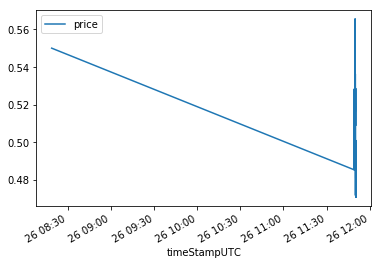

In [24]:
plt.figure(); a['price'].plot(); plt.legend(loc='best')


# Curl API examples



## Create user

~~~~
curl --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createUser
~~~~
        
## Create market

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketRootId": 1, 
"marketBranchId": 5, 
"marketMin": 0, 
"marketMax": 1}' 
--header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createMarket
~~~~
    
## Create trade

~~~~
curl --data '{"signingKey_hex": "ece2efc138c8298d43caba1315ceda614e20644c74d46fed37871c47ea19afdf",
"traderId": 1, 
"verifyKey_hex": "9690a2e12971ae452d68bf3d08405090d45791533cf80740fd186aea4b6773fc",
"marketId": 1,
"price": 0.1212,
"quantity": 1}' --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/createTrade

~~~~
        
## View order book (output to file)

~~~~
curl --header "Content-Type: application/json" -X POST http://blocmarket.herokuapp.com/viewOrderBook --output ob.txt
~~~~    
        
Also can load json from file with something like 
~~~~ 
curl -d "@data.json" -X POST http://blocmarket.herokuapp.com/data 
~~~~


# Matlab
TODO

# Powershell

TODO


    

# Setup for release

- Get extra database rows on Heroku
- Single 